In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings("ignore")

In [3]:
startup_data = pd.read_csv("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Multi Linear Regression/50_Startups.csv")
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startup_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [15]:
rename_col_names=startup_data.rename(columns={'R&D Spend':'RNDSpend','Administration':'Administration','Marketing Spend':'MarketingSpend','Profit':'Profit'})
rename_col_names

,RNDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


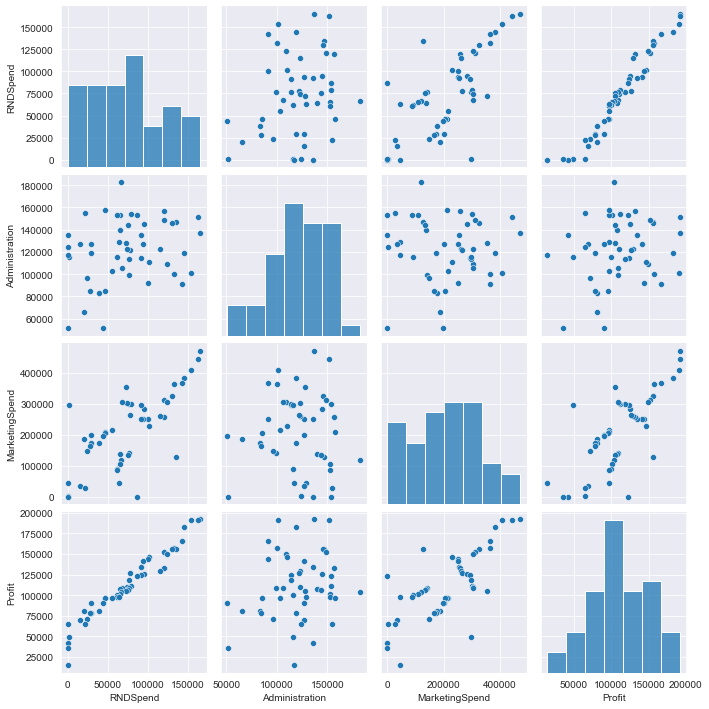

In [16]:
sns.set_style(style="darkgrid")
sns.pairplot(rename_col_names)

In [17]:
model = smf.ols('Administration~Profit+MarketingSpend+RNDSpend',data=rename_col_names).fit()

In [18]:
model.fittedvalues

0     126605.745146
1     127886.725636
2     126665.548691
3     126090.328066
4     130225.683330
5     127283.719652
6     150828.729019
7     130378.289359
8     127258.930369
9     129868.960659
10    126659.219059
11    124511.093937
12    121572.149203
13    121959.321975
14    136452.064504
15    133752.606765
16    115259.323219
17    122538.025557
18    120126.356778
19    145207.900192
20    113043.066907
21    115642.369711
22    113246.476264
23    110125.507049
24    130406.459406
25    124495.807315
26    130754.237639
27    108807.434243
28    127979.405972
29    129282.313146
30    129143.189309
31    129516.720633
32    134635.826999
33    114960.158845
34    110637.651441
35    110968.726589
36    103679.066442
37    112207.154282
38    102901.065351
39    113398.625178
40    109143.303143
41    109571.975405
42    110308.709090
43    116974.256203
44    122114.895688
45    113676.099331
46     89737.714226
47    118313.178966
48    120126.313774
49    120303.550338


In [19]:
model.params

Intercept         127784.372053
Profit                -0.222539
MarketingSpend        -0.093278
RNDSpend               0.517777
dtype: float64

In [20]:
rename_col_names

,RNDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
rename_col_names['Predictions_Manual']=127784.372053-0.222539*rename_col_names['Profit'] -0.093278*rename_col_names['MarketingSpend']+  0.517777*rename_col_names['RNDSpend']
rename_col_names['Predictions_Model']=model.fittedvalues
rename_col_names['Errors_Manual']=rename_col_names['Administration']-rename_col_names['Predictions_Manual']
rename_col_names['Errors_Model']=model.resid
rename_col_names

,RNDSpend,Administration,MarketingSpend,State,Profit,Predictions_Manual,Predictions_Model,Errors_Manual,Errors_Model
0,165349.20,136897.80,471784.10,New York,192261.83,126605.552115,126605.745146,10292.247885,10292.054854
1,162597.70,151377.59,443898.53,California,191792.06,127886.541044,127886.725636,23491.048956,23490.864364
2,153441.51,101145.55,407934.54,Florida,191050.39,126665.376014,126665.548691,-25519.826014,-25519.998691
3,144372.41,118671.85,383199.62,New York,182901.99,126090.165279,126090.328066,-7418.315279,-7418.478066
4,142107.34,91391.77,366168.42,Florida,166187.94,130225.528376,130225.683330,-38833.758376,-38833.913330
5,131876.90,99814.71,362861.36,New York,156991.12,127283.568913,127283.719652,-27468.858913,-27469.009652
6,134615.46,147198.87,127716.82,California,156122.51,150828.644297,150828.729019,-3629.774297,-3629.859019
7,130298.13,145530.06,323876.68,Florida,155752.60,130378.150102,130378.289359,15151.909898,15151.770641
8,120542.52,148718.95,311613.29,New York,152211.77,127258.796882,127258.930369,21460.153118,21460.019631
9,123334.88,108679.17,304981.62,California,149759.96,129868.828926,129868.960659,-21189.658926,-21189.790659


In [23]:
#t and p-Values
print(model.tvalues,'\n',model.pvalues)

Intercept         5.979320
Profit           -0.525507
MarketingSpend   -1.992950
RNDSpend          1.446083
dtype: float64 
 Intercept         3.109980e-07
Profit            6.017551e-01
MarketingSpend    5.221857e-02
RNDSpend          1.549335e-01
dtype: float64


In [24]:
model.pvalues

Intercept         3.109980e-07
Profit            6.017551e-01
MarketingSpend    5.221857e-02
RNDSpend          1.549335e-01
dtype: float64

In [25]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.15408049296399062, 0.09891182946164212)

In [26]:
model = smf.ols('Profit~Administration+MarketingSpend+RNDSpend',data=rename_col_names).fit()

In [27]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [28]:
model.params

Intercept         50122.192990
Administration       -0.026816
MarketingSpend        0.027228
RNDSpend              0.805715
dtype: float64

In [30]:
rename_col_names['Predictions_Manual']=50122.192990-0. -0.026816*rename_col_names['Administration']+0.027228*rename_col_names['MarketingSpend']+0.805715*rename_col_names['RNDSpend']
rename_col_names['Predictions_Model']=model.fittedvalues
rename_col_names['Errors_Manual']=rename_col_names['Profit']-rename_col_names['Predictions_Manual']
rename_col_names['Errors_Model']=model.resid
rename_col_names

,RNDSpend,Administration,MarketingSpend,State,Profit,Predictions_Manual,Predictions_Model,Errors_Manual,Errors_Model
0,165349.20,136897.80,471784.10,New York,192261.83,192521.209738,192521.252890,-259.379738,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.726567,189156.768232,2635.333433,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.241806,182147.279096,8903.148194,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.664237,173696.700026,9205.325763,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.480474,172139.514183,-5951.540474,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.747320,163580.780571,-6589.627320,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.077021,158114.096669,-1991.567021,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.330957,160021.363048,-4268.730957,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.668789,151741.699699,470.101211,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.654756,154884.684110,-5124.694756,-5124.724110


In [31]:
#t and p-Values
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
Administration    -0.525507
MarketingSpend     1.655077
RNDSpend          17.846374
dtype: float64 
 Intercept         1.057379e-09
Administration    6.017551e-01
MarketingSpend    1.047168e-01
RNDSpend          2.634968e-22
dtype: float64


In [32]:
model.pvalues

Intercept         1.057379e-09
Administration    6.017551e-01
MarketingSpend    1.047168e-01
RNDSpend          2.634968e-22
dtype: float64

In [33]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)